In [12]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Shape of Dataset: (1348, 2914)


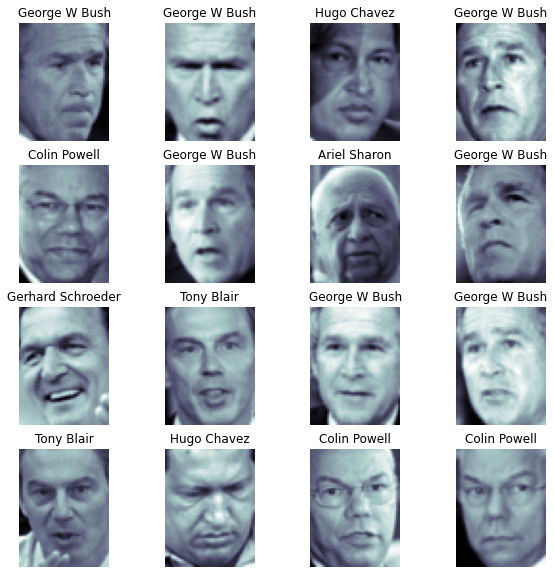

In [27]:
faces_dataset = fetch_lfw_people(min_faces_per_person = 60)
print("Shape of Dataset: {}".format(faces_dataset.data.shape))

index = np.random.randint(0, faces_dataset.data.shape[0], size=16)
plt.rcParams['figure.figsize']=(10, 10)

i = 0
fig, axs = plt.subplots(4, 4)
for r in range(4):
    for c in range(4):
        axs[r, c].imshow(faces_dataset.images[index[i]], cmap=plt.cm.bone)
        axs[r, c].set_title(str(faces_dataset.target_names[faces_dataset.target[index[i]]]))
        axs[r, c].axis('off')
        i+=1

https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py
https://machinelearningmastery.com/face-recognition-using-principal-component-analysis/
https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_eigenfaces.html
https://github.com/fenago/ai-for-business/blob/22c3a40cb1123ba198f6c5f69b160b978a69e443/Hands-On-Artificial-Intelligence-for-Cybersecurity/Chapter06/sources/Facial%20Recognition.ipynb

### PCA on the dataset to find the first 150 components, using randomized PCA from `sklearn`

In [14]:
faces_pca = PCA(n_components=150, whiten=True, svd_solver='randomized')
_ = faces_pca.fit(faces_dataset.data)

### Eigenfaces associated with first 25 principal components

In [16]:
faces_pca_components = faces_pca.components_

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)